<a href="https://colab.research.google.com/github/SAPUII/Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [936]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##หุ้น PTT

In [937]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [938]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [939]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [940]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [941]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

#แทนที่ M ด้วยช่องว่าง
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##หุ้น SCG

In [942]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [943]:
scg.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,6.15,6.10,6.15,6.05,183.00K,0.00%
1,5/1/2022,6.25,6.10,6.35,6.05,1.15M,1.63%
2,6/1/2022,6.10,6.25,6.25,6.10,133.50K,-2.40%
3,7/1/2022,6.10,6.05,6.15,6.05,205.10K,0.00%
4,10/1/2022,6.15,6.05,6.15,6.00,144.40K,0.82%


In [944]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [945]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [946]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##หุ้น SOLAR

In [947]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [948]:
solar.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,1.51,1.52,1.54,1.49,9.13M,0.67%
1,5/1/2022,1.51,1.51,1.52,1.46,4.25M,0.00%
2,6/1/2022,1.44,1.51,1.51,1.44,9.95M,-4.64%
3,7/1/2022,1.24,1.37,1.37,1.23,93.48M,-13.89%
4,10/1/2022,1.24,1.25,1.27,1.22,21.28M,0.00%


In [949]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [950]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [951]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

<ipython-input-951-a416bd1d44b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
<ipython-input-951-a416bd1d44b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar['ปริมาณ']=solar['ปริมาณ'].astype(int)


,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


## ราคาน้ำมันดิบ (WTI)

In [952]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [953]:
wti.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,2/1/2022,76.03,75.83,76.12,75.83,NaN,0.53%
1,3/1/2022,76.17,76.05,76.65,74.50,NaN,0.18%
2,4/1/2022,77.25,76.19,77.84,75.92,NaN,1.42%
3,5/1/2022,77.39,77.23,78.76,76.72,NaN,0.18%
4,6/1/2022,79.69,77.38,80.43,76.92,NaN,2.97%


In [954]:
wti.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [955]:
wti.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [956]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##ราคาทองคำ (XAU)

In [957]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [958]:
xau.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,"1,800.85","1,830.14","1,832.06","1,797.93",NaN,-1.51%
1,4/1/2022,"1,814.56","1,801.34","1,816.83","1,798.44",NaN,0.76%
2,5/1/2022,"1,809.53","1,814.90","1,829.82","1,807.97",NaN,-0.28%
3,6/1/2022,"1,788.68","1,809.94","1,811.89","1,786.03",NaN,-1.15%
4,7/1/2022,"1,795.63","1,789.55","1,799.20","1,782.63",NaN,0.39%


In [959]:
xau.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [960]:
xau.dtypes

วันเดือนปี     object
ล่าสุด         object
ราคาเปิด       object
สูงสุด         object
ต่ำสุด         object
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [961]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

,date,cp_xau
0,3/1/2022,1800.85
1,4/1/2022,1814.56
2,5/1/2022,1809.53
3,6/1/2022,1788.68
4,7/1/2022,1795.63
...,...,...
255,26/12/2022,1797.61
256,27/12/2022,1813.93
257,28/12/2022,1804.09
258,29/12/2022,1814.89


##อัตราแลกเปลี่ยน (EX)

In [962]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
ex.shape

(260, 7)

In [963]:
ex.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [964]:
ex.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [965]:
ex.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [966]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ex=ex[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ex =ex.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex

,date,cp_ex
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##Merge Table

In [967]:
tm1 = wti.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5.head()

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,1800.85,NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,1814.56,38.0,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,1809.53,39.0,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,1788.68,38.0,71680000.0,6.10,133500.0,1.44,9950000.0


In [968]:
tm5.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [969]:
#ลบค่า NaN
all_data= tm5.dropna()

# แทนที่เครื่องหมาย / ด้วย - ในคอลัมน์ date
all_data['date'] = all_data['date'].str.replace('/', '-')

# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data

<ipython-input-969-9071ba2101b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')
<ipython-input-969-9071ba2101b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
<ipython-input-969-9071ba2101b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [970]:
# save data
#all_data.to_csv('Project_data.csv', index=False)

## Standardize

In [971]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...
305,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [972]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit และ Transform ข้อมูล
scaled_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# แสดงผลลัพธ์
scaled_df

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.797703,-1.100940,-1.703451,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.797676,-1.137859,-1.881685,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.547293,-0.916344,-1.912759,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.583688,-0.873271,-1.680860,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.613344,-0.873271,-1.555289,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.335439,-0.270256,-0.134575,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.398189,-0.159498,-0.144739,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.428197,-0.257950,-0.089656,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


In [973]:
#หาความสัมพันธ์
correlation_matrix = scaled_df.corr()
correlation_matrix

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.051631,0.633348,0.154632,0.025324,-0.267331,-0.020053,0.258085,0.211177
cp_ex,0.051631,1.000000,0.061141,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.633348,0.061141,1.000000,-0.134076,0.008375,-0.512522,-0.112726,0.018376,0.135715
cp_ptt,0.154632,-0.585569,-0.134076,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.025324,-0.116166,0.008375,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.267331,-0.622965,-0.512522,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,-0.020053,-0.136218,-0.112726,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.258085,-0.354033,0.018376,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.211177,-0.144074,0.135715,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


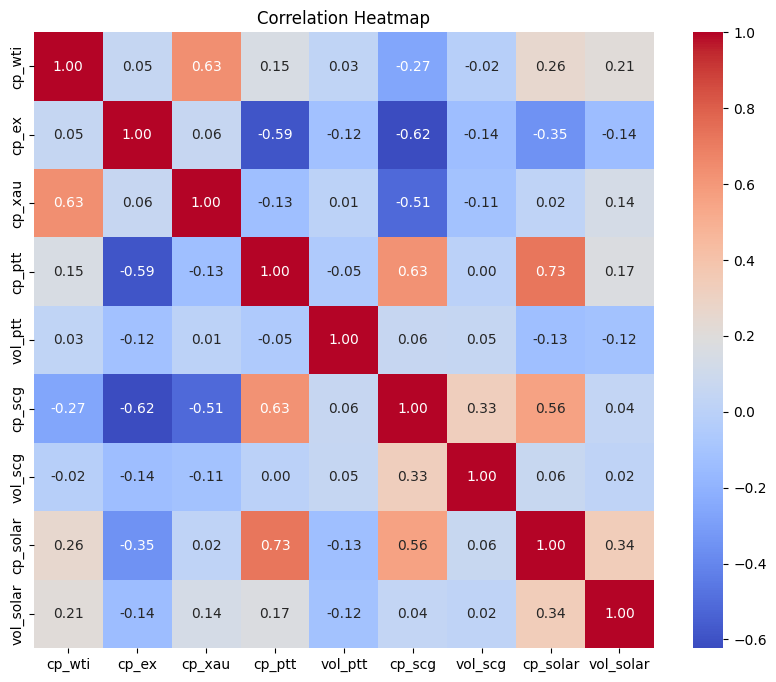

In [974]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

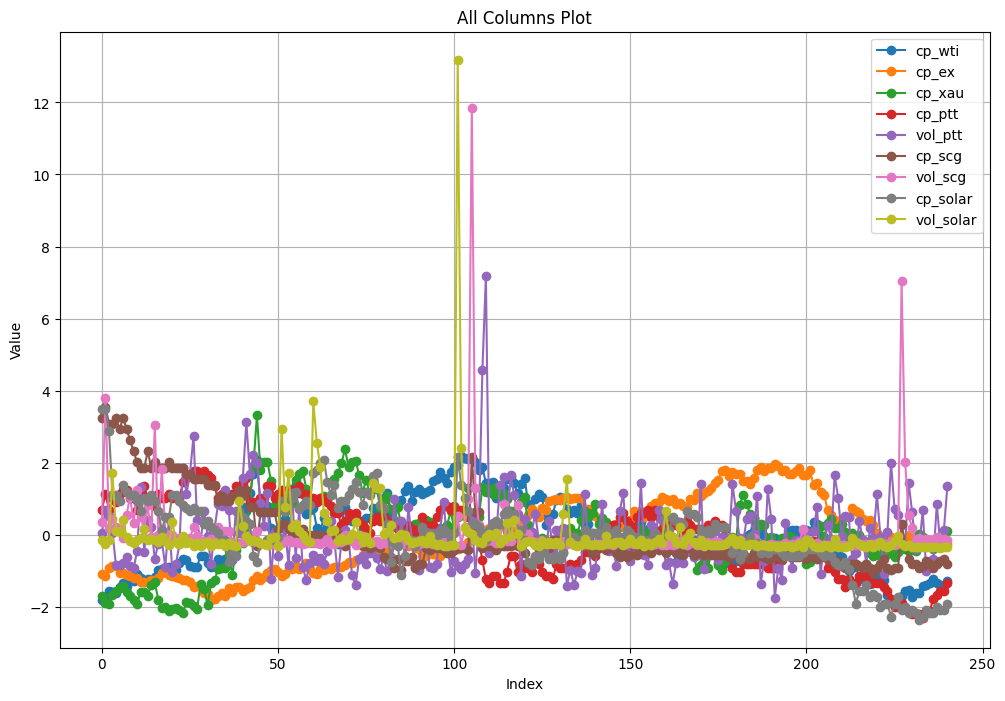

In [975]:
plt.figure(figsize=(12, 8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#LSTM

##ตัวแปรเดียว

In [976]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [977]:
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...
305,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [978]:
all_data_X.shape

(241, 9)

In [979]:
import math
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create a new dataframe with only the 'Close' column
data = all_data_X.filter(['cp_ptt'])

# Convert the dataframe to a numpy array
dataset = data.values

# Define the proportion of data for training (e.g., 80% for training, 20% for testing)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

# Split the dataset into training and testing sets
X_train = dataset[:train_size, :]
X_test = dataset[train_size:, :]

# Define your target variable (y) based on your dataset's structure
# For example, if 'cp_ptt' is the target column:
y_train = X_train[:, 0]  # Assuming 'cp_ptt' is the first column
y_test = X_test[:, 0]

# Initialize variables for best hyperparameters and best RMSE
best_rmse = float('inf')
best_params = None

# Hyperparameter tuning loop
for units in [50, 100, 150]:
    for epochs in [50, 100, 200]:
        for batch_size in [32, 64, 128]:
            # Build the model
            model = Sequential()
           # Build the model
            model = Sequential()
            model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))  # Assuming only 1 feature ('Close')
            model.add(Dense(1))  # Assuming you're predicting a single output

            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')

            # Train the model
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            # Compare RMSE and store the best hyperparameters
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = (units, epochs, batch_size)

print("Best Parameters (units, epochs, batch_size):", best_params)
print("Best RMSE:", best_rmse)



2/2 [==============================] - 1s 10ms/step
Best Parameters (units, epochs, batch_size): (100, 200, 128)
Best RMSE: 1.5541913918265617


In [980]:
#Create a new dataframe with only the 'Close column
data= all_data_X.filter(['cp_ptt'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

193

In [981]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.73684211],
       [0.84210526],
       [0.73684211],
       [0.81578947],
       [0.78947368],
       [0.84210526],
       [0.86842105],
       [0.86842105],
       [0.81578947],
       [0.81578947],
       [0.73684211],
       [0.84210526],
       [0.89473684],
       [0.81578947],
       [0.78947368],
       [0.76315789],
       [0.84210526],
       [0.81578947],
       [0.81578947],
       [0.84210526],
       [0.81578947],
       [0.81578947],
       [0.81578947],
       [0.92105263],
       [0.94736842],
       [0.97368421],
       [1.        ],
       [1.        ],
       [0.97368421],
       [1.        ],
       [0.97368421],
       [0.94736842],
       [0.89473684],
       [0.81578947],
       [0.84210526],
       [0.78947368],
       [0.81578947],
       [0.84210526],
       [0.89473684],
       [0.84210526],
       [0.92105263],
       [0.94736842],
       [0.78947368],
       [0.78947368],
       [0.76315789],
       [0.81578947],
       [0.81578947],
       [0.894

In [982]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.73684211, 0.84210526, 0.73684211, 0.81578947, 0.78947368,
       0.84210526, 0.86842105, 0.86842105, 0.81578947, 0.81578947,
       0.73684211, 0.84210526, 0.89473684, 0.81578947, 0.78947368,
       0.76315789, 0.84210526, 0.81578947, 0.81578947, 0.84210526,
       0.81578947, 0.81578947, 0.81578947, 0.92105263, 0.94736842,
       0.97368421, 1.        , 1.        , 0.97368421, 1.        ,
       0.97368421, 0.94736842, 0.89473684, 0.81578947, 0.84210526,
       0.78947368, 0.81578947, 0.84210526, 0.89473684, 0.84210526,
       0.92105263, 0.94736842, 0.78947368, 0.78947368, 0.76315789,
       0.81578947, 0.81578947, 0.89473684, 0.89473684, 0.81578947,
       0.84210526, 0.86842105, 0.84210526, 0.84210526, 0.86842105,
       0.86842105, 0.89473684, 0.84210526, 0.84210526, 0.81578947])]
[0.8157894736842102]

[array([0.73684211, 0.84210526, 0.73684211, 0.81578947, 0.78947368,
       0.84210526, 0.86842105, 0.86842105, 0.81578947, 0.81578947,
       0.73684211, 0.84210526, 0.894

In [983]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(133, 60, 1)

In [984]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [985]:
#Compile the model
model.compile(optimizer ='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=128, epochs=200)

Epoch 1/200
2/2 [==============================] - 7s 131ms/step - loss: 0.3680
Epoch 2/200
2/2 [==============================] - 0s 76ms/step - loss: 0.0859
Epoch 3/200
2/2 [==============================] - 0s 74ms/step - loss: 0.0537
Epoch 4/200
2/2 [==============================] - 0s 89ms/step - loss: 0.0442
Epoch 5/200
2/2 [==============================] - 0s 77ms/step - loss: 0.0140
Epoch 6/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0270
Epoch 7/200
2/2 [==============================] - 0s 85ms/step - loss: 0.0341
Epoch 8/200
2/2 [==============================] - 0s 93ms/step - loss: 0.0284
Epoch 9/200
2/2 [==============================] - 0s 84ms/step - loss: 0.0169
Epoch 10/200
2/2 [==============================] - 0s 94ms/step - loss: 0.0115
Epoch 11/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0174
Epoch 12/200
2/2 [==============================] - 0s 78ms/step - loss: 0.0206
Epoch 13/200
2/2 [==============================

In [986]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Split the data into x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [987]:
#Convert the data to numpy arrays
x_test = np.array(x_test)

In [988]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [989]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test )**2)
rmse

2/2 [==============================] - 1s 32ms/step


0.3078163067499797

In [990]:
predictions

array([[34.57516 ],
       [34.68152 ],
       [34.840004],
       [34.979355],
       [35.203228],
       [35.534725],
       [35.82338 ],
       [36.013035],
       [36.100784],
       [36.04022 ],
       [35.994587],
       [35.88649 ],
       [35.708584],
       [35.412804],
       [34.955395],
       [34.696533],
       [34.39792 ],
       [34.0556  ],
       [33.79767 ],
       [33.533203],
       [33.455048],
       [33.42255 ],
       [33.426754],
       [33.562874],
       [33.728405],
       [33.872746],
       [33.861137],
       [33.78651 ],
       [33.699753],
       [33.62573 ],
       [33.5174  ],
       [33.366016],
       [33.126404],
       [32.8066  ],
       [32.58222 ],
       [32.44875 ],
       [32.337868],
       [32.217648],
       [32.07676 ],
       [31.960613],
       [31.881874],
       [31.793   ],
       [31.809536],
       [31.87105 ],
       [32.079914],
       [32.364326],
       [32.67666 ],
       [32.936855]], dtype=float32)

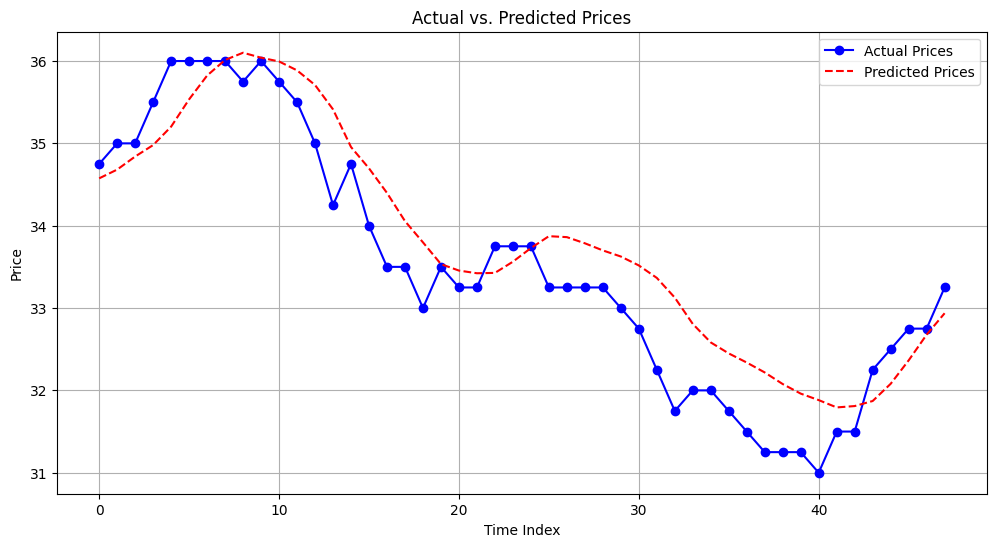

In [991]:
# นำเข้าแพ็คเกจที่ต้องการ
import matplotlib.pyplot as plt

# สร้างชุดข้อมูลเวลา (indices) สำหรับ x_test
time_indices = range(len(y_test))

# สร้างกราฟ
plt.figure(figsize=(12, 6))
plt.plot(time_indices, y_test, label='Actual Prices', color='blue', marker='o')
plt.plot(time_indices, predictions, label='Predicted Prices', color='red', linestyle='--')

# เพิ่มรายละเอียดกราฟ
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()


##หลายตัวแปร

In [1049]:
#Create a new dataframe with only the 'Close column
d = all_data_X.filter(['cp_wti','cp_ex','cp_xau','vol_ptt'])
#Convert the dataframe to a numpy array
dataset = d.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

193

In [1050]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define the training data length (e.g., 80% of data)
training_data_len = int(len(scaled_data) * 0.8)

# Split the data into training and testing sets
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

# กำหนดตัวแปรต้นและตัวแปรเป้าหมายสำหรับการฝึกและทดสอบ
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]


In [1052]:
# Create the training and testing datasets
X_train, y_train, X_test, y_test = [], [], [], []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i, 0])

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, :])
    y_test.append(test_data[i, 0])

# Convert the datasets to numpy arrays
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [1053]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 4)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [1054]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [1055]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

132/132 [==============================] - 8s 31ms/step - loss: 0.0219


In [1056]:
# Make predictions
predictions = model.predict(X_test)

ValueError: ignored

In [ ]:
# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(np.column_stack((predictions, x_test[:, -2:]))